# **Cantidad pedida**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ")
data

,D,K,h,L,cantidad_pedido,reorden
0,100,100.0,0.02,12,1000,200
1,300,20.0,0.21,1,239,60
2,120,30.0,0.04,5,424,175
3,145,23.0,0.05,6,365,139
4,80,15.0,0.03,10,282,234
...,...,...,...,...,...,...
95,128,149.5,0.06,8,798,225
96,314,118.2,6.31,1,108,97
97,910,19.6,3.70,5,98,33
98,680,79.2,0.25,2,656,47


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D",	"K",	"h",	"L"]])
targets = np.asarray(data["reorden"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

44.0

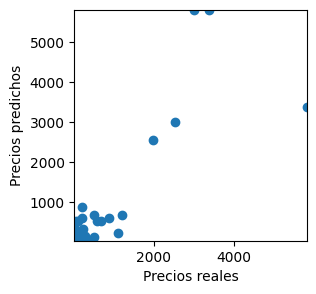

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[8.0000e+01, 1.5000e+01, 3.0000e-02, 1.0000e+01],
       [3.0000e+03, 2.0000e+02, 4.0000e-01, 2.0000e+01],
       [2.2200e+02, 4.2000e+01, 1.0000e-01, 6.0000e+00],
       [2.3400e+02, 1.1763e+02, 7.8900e+00, 9.0000e+00],
       [1.6200e+02, 3.4710e+01, 4.0100e+00, 7.0000e+00],
       [7.7500e+02, 1.2193e+02, 2.2400e+00, 1.2000e+01],
       [2.1800e+02, 5.3290e+01, 9.3400e+00, 1.1000e+01],
       [4.3500e+02, 9.3470e+01, 8.5800e+00, 1.0000e+01],
       [3.2200e+02, 6.5980e+01, 7.4500e+00, 3.0000e+00],
       [9.1500e+02, 8.9350e+01, 6.0300e+00, 2.0000e+00],
       [7.5100e+02, 6.9800e+02, 6.0000e-02, 4.0000e+00],
       [3.4100e+02, 2.5600e+02, 5.0000e-02, 2.0000e+00],
       [7.2000e+02, 5.6500e+02, 4.0000e-02, 9.0000e+00],
       [1.3000e+02, 2.0350e+01, 2.6400e+00, 1.1000e+01],
       [2.9300e+02, 4.8620e+01, 1.4300e+00, 4.0000e+00],
       [4.5700e+02, 2.7400e+01, 7.8900e+00, 1.0000e+00],
       [2.7600e+02, 5.8450e+01, 7.6300e+00, 1.0000e+01],
       [1.6700e+02, 1.5840e+02,

In [ ]:
cop = d_tree.predict([[784,	68.13,	0.27,	1]])

In [ ]:
cop

array([122.])

# **Punto reorden**


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="EOQ")
data

,D,K,h,L,Cantidad a pedir,Punto de reorden
0,602,53.193988,4.803646,5,115.467304,7.850101
1,935,65.869443,1.828454,2,259.549855,53.151016
2,848,61.015955,3.847163,2,164.007729,55.922705
3,770,75.765259,3.969524,4,171.445553,165.425592
4,606,55.118354,2.992482,4,149.411372,33.418055
...,...,...,...,...,...,...
9995,556,55.581834,3.269109,6,137.500443,35.989359
9996,611,72.051740,1.716667,2,226.472121,89.639394
9997,504,67.693537,2.971393,2,151.538789,98.767265
9998,909,61.165752,4.494511,9,157.293176,1.754837


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D",	"K",	"h",	"L"]])
targets = np.asarray(data["Punto de reorden"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 100
                               )

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

53.84834445827161

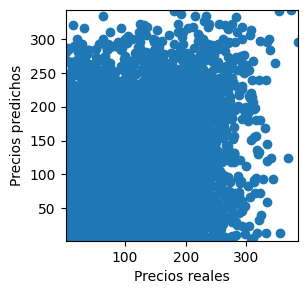

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(2,targets.max())
plt.ylim(2,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[770.        ,  75.7652594 ,   3.96952356,   4.        ],
       [587.        ,  67.2929429 ,   1.45785826,   6.        ],
       [649.        ,  59.59777195,   1.14074137,   8.        ],
       ...,
       [709.        ,  76.30876603,   4.58182311,   1.        ],
       [778.        ,  53.47434124,   3.22429545,   7.        ],
       [533.        ,  55.48319148,   1.69519849,   2.        ]])

In [ ]:
cop = d_tree.predict([[1847,	16.39,	0.36,	3]])

In [ ]:
cop

array([332.18716317])